<a href="https://colab.research.google.com/github/panchambanerjee/RAG_stuff/blob/main/mmrag_comicstrip_calvinhobbes_2023_01_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Multi-Modal RAG with LlamaIndex: Try to analyze comic strips

In [1]:
%pip install llama_index ftfy regex tqdm
%pip install git+https://github.com/openai/CLIP.git
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install -U qdrant_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautif

In [2]:
%pip install python-dotenv

In [3]:
%%writefile .env
OPENAI_API_KEY='' # Put your OpenAI API Key here

Writing .env


In [4]:
## Create .env file with OpenAI Key above here

from dotenv import load_dotenv

load_dotenv()


True

In [5]:
import os

openai_api_key = os.environ['OPENAI_API_KEY']

## Initial:: Analyze some comic strips, see how it does

In [6]:
from pathlib import Path

input_image_path = Path("input_images")
if not input_image_path.exists():
    Path.mkdir(input_image_path)

In [7]:
!wget "https://cdn.vox-cdn.com/thumbor/viTqwGLPq35Ud4yuacwd2gH7Idc=/0x0:3500x1171/1920x0/filters:focal(0x0:3500x1171):format(webp):no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/19964058/ch870324.jpg" -O ./input_images/calvin_and_hobbes_1.png
!wget "https://cdn.vox-cdn.com/thumbor/nmS1sFtA8402OzOV4WLEf17QVGQ=/0x0:3500x2487/1920x0/filters:focal(0x0:3500x2487):format(webp):no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/19964110/calvin_hobbes_gravity_grabbing_plane_comic_strip.jpg" -O ./input_images/calvin_and_hobbes_2.png
!wget "https://cdn.vox-cdn.com/thumbor/QwVtQXj10q652GnJLH38hm236co=/0x0:3500x1117/1920x0/filters:focal(0x0:3500x1117):format(webp):no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/19964098/ch150629.jpg" -O ./input_images/calvin_and_hobbes_3.png
!wget "https://cdn.vox-cdn.com/thumbor/0qgaVMD7Kve6W5yTyrd0LQZ1qpM=/0x0:3500x2425/1920x0/filters:focal(0x0:3500x2425):format(webp):no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/19964119/calvin_hobbes_final_comic_strip.jpg" -O ./input_images/calvin_and_hobbes_4.png
# !wget "https://netorg3861264-my.sharepoint.com/:i:/g/personal/panchajanya_banerjee_pacificdataintegrators_com/EZvHiXMDnkxCt_wmZ-UykjgBm3hW5xFbUalBUfjPsFMZvA?e=qCkFRN" -O ./input_images/archie.png

--2024-01-12 06:49:39--  https://cdn.vox-cdn.com/thumbor/viTqwGLPq35Ud4yuacwd2gH7Idc=/0x0:3500x1171/1920x0/filters:focal(0x0:3500x1171):format(webp):no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/19964058/ch870324.jpg
Resolving cdn.vox-cdn.com (cdn.vox-cdn.com)... 199.232.192.124, 199.232.196.124
Connecting to cdn.vox-cdn.com (cdn.vox-cdn.com)|199.232.192.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152748 (149K) [image/webp]
Saving to: ‘./input_images/calvin_and_hobbes_1.png’

./input_images/calv 100%[===================>] 149.17K  --.-KB/s    in 0.02s   

2024-01-12 06:49:39 (6.19 MB/s) - ‘./input_images/calvin_and_hobbes_1.png’ saved [152748/152748]

--2024-01-12 06:49:39--  https://cdn.vox-cdn.com/thumbor/nmS1sFtA8402OzOV4WLEf17QVGQ=/0x0:3500x2487/1920x0/filters:focal(0x0:3500x2487):format(webp):no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/19964110/calvin_hobbes_gravity_grabbing_plane_comic_strip.jpg
Resolving cdn.vox-cdn.com (cdn.

All images below sourced from https://www.polygon.com/comics/2020/5/13/21254476/calvin-and-hobbes-comic-strips-books-quarantine

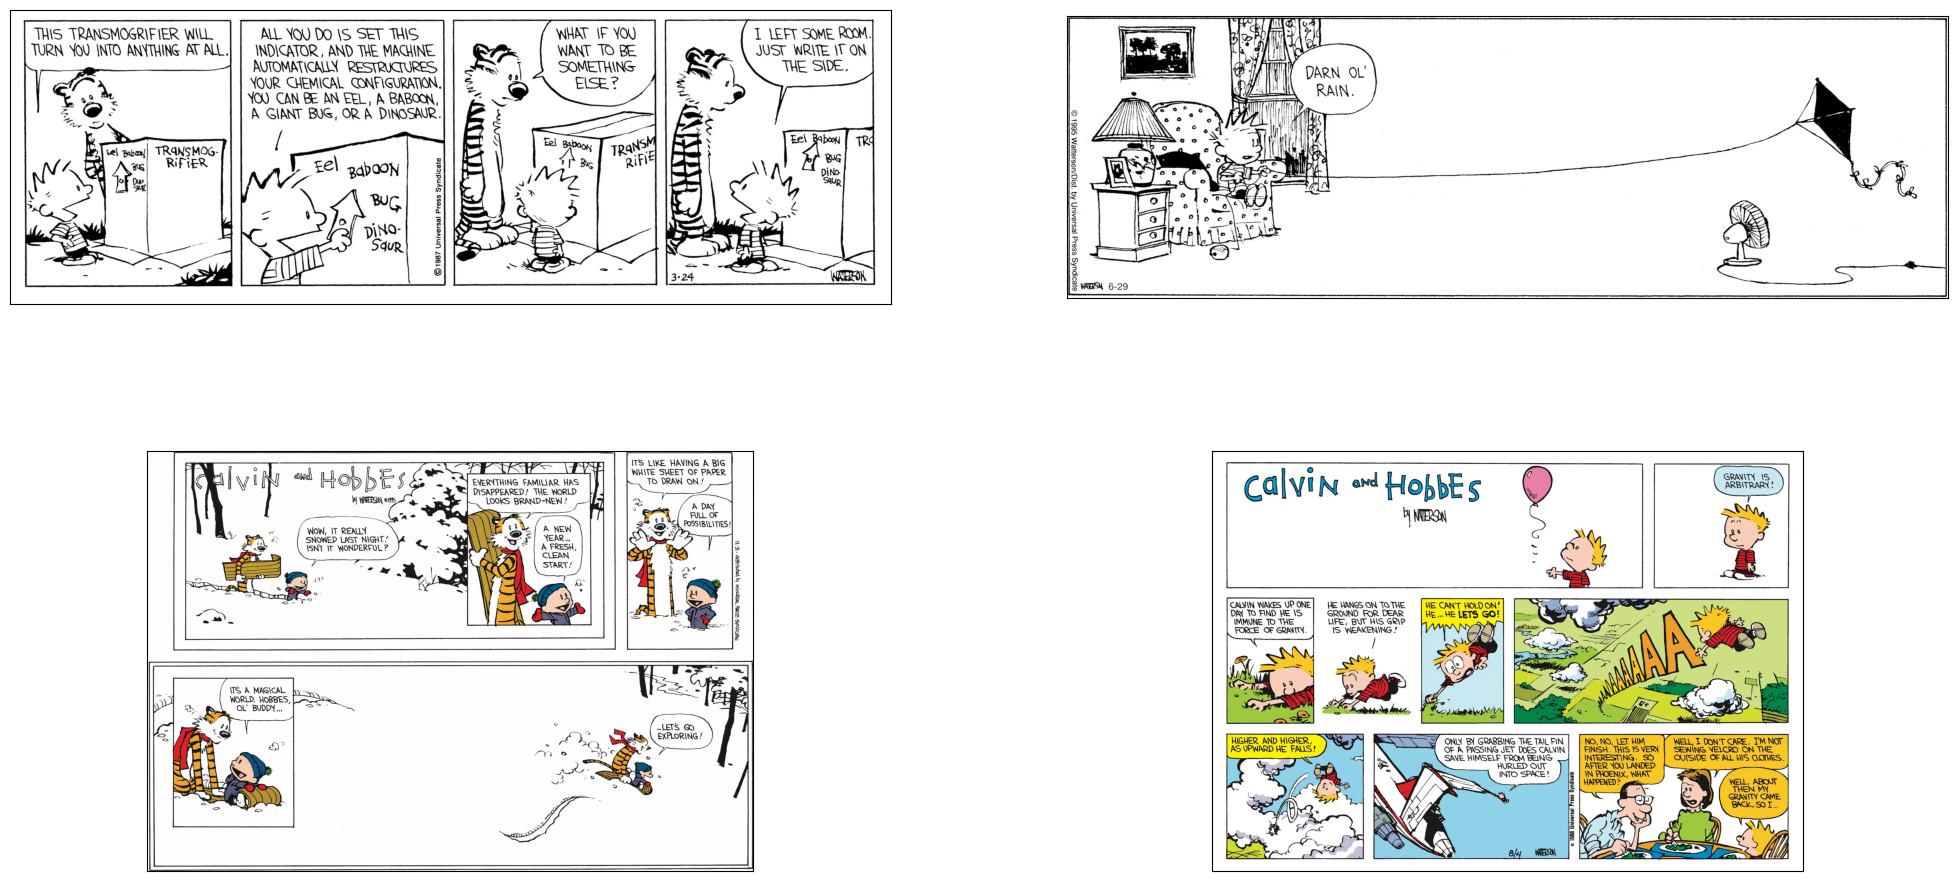

In [8]:
## Plot the input images

from PIL import Image
import matplotlib.pyplot as plt
import os

image_paths = []
for img_path in os.listdir("./input_images"):
    image_paths.append(str(os.path.join("./input_images", img_path)))


def plot_images(image_paths):
    images_shown = 0
    plt.figure(figsize=(25, 12))
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 2, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 9:
                break


plot_images(image_paths)

In [9]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index import SimpleDirectoryReader

# put your local directore here
image_documents = SimpleDirectoryReader("./input_images").load_data()

openai_mm_llm = OpenAIMultiModal(
    model="gpt-4-vision-preview", api_key=openai_api_key, max_new_tokens=1500
)

response_1 = openai_mm_llm.complete(
    prompt="Describe the comic strip panels as an alternative text",
    image_documents=image_documents,
)

print(response_1)

The images you've provided are four separate comic strips from the "Calvin and Hobbes" series by Bill Watterson.

1. In the first strip, there are three panels. In the first panel, Calvin is standing outside next to a large box with dials and a sign that reads "Transmogrifier." He says, "This transmogrifier will turn you into anything at all." In the second panel, he continues to explain to Hobbes, "All you do is set this indicator, and the machine automatically restructures your chemical configuration. You can be an eel, a baboon, a giant bug, or a dinosaur." Hobbes, looking at the box, replies, "Eel, baboon, dino-saur." In the third panel, Calvin, now inside the box, ponders, "What if you want to be something else?" Hobbes, sitting on top of the box, replies, "I left some room. Just write it on the side."

2. The second strip has six panels. In the first panel, Calvin is holding onto a balloon and says, "Gravity is arbitrary." In the second panel, he lets go of the balloon and watche

In [ ]:
response_2 = openai_mm_llm.complete(
    prompt="Why was Calvin flying a kite indoors?",
    image_documents=image_documents,
)

print(response_2)

Calvin is flying a kite indoors in the third comic strip because it is raining outside, as indicated by his statement "Darn ol' rain." The rain has likely prevented him from going outside to fly his kite, so he has resorted to using a fan indoors to simulate the wind necessary for kite flying. This is a humorous and imaginative solution typical of Calvin's character in the "Calvin and Hobbes" comic strip by Bill Watterson.


In [ ]:
response_3 = openai_mm_llm.complete(
    prompt="What can we say about Calvin's imagination?",
    image_documents=image_documents,
)

print(response_3)

Calvin's imagination in the "Calvin and Hobbes" comic strip is incredibly vivid and expansive. He often transforms his everyday surroundings into fantastical landscapes and scenarios. In the first image, Calvin imagines a "Transmogrifier," a device that can change his form into anything he desires, such as an elephant, a baboon, or a dinosaur, showcasing his creative and whimsical thought process.

In the second image, Calvin's imagination takes flight—literally—as he envisions himself being carried away by a balloon, defying gravity. This strip highlights his sense of adventure and his playful approach to the physical laws of the universe.

The third image shows Calvin's ability to find magic in the mundane, as he imagines his kite and stuffed tiger, Hobbes, flying outside in the rain while he's indoors, turning a gloomy day into a scene filled with possibility.

Finally, the fourth image illustrates Calvin's perception of a fresh snowfall as a blank canvas full of potential, likening

### Get Calvin & Hobbes images and text from Wikipedia and other internet sources(?) to create a Multi-Modal RAG Index

In [10]:
import requests


def get_wikipedia_images(title):
    response = requests.get(
        "https://en.wikipedia.org/w/api.php",
        params={
            "action": "query",
            "format": "json",
            "titles": title,
            "prop": "imageinfo",
            "iiprop": "url|dimensions|mime",
            "generator": "images",
            "gimlimit": "50",
        },
    ).json()
    image_urls = []
    for page in response["query"]["pages"].values():
        if page["imageinfo"][0]["url"].endswith(".jpg") or page["imageinfo"][
            0
        ]["url"].endswith(".png"):
            image_urls.append(page["imageinfo"][0]["url"])
    return image_urls


In [11]:
from pathlib import Path
import requests
import urllib.request

image_uuid = 0
# image_metadata_dict stores images metadata including image uuid, filename and path
image_metadata_dict = {}
MAX_IMAGES_PER_WIKI = 20

wiki_titles = {
    "Calvin and Hobbes",
}


data_path = Path("mixed_wiki")
if not data_path.exists():
    Path.mkdir(data_path)

for title in wiki_titles:
    response = requests.get(
        "https://en.wikipedia.org/w/api.php",
        params={
            "action": "query",
            "format": "json",
            "titles": title,
            "prop": "extracts",
            "explaintext": True,
        },
    ).json()
    page = next(iter(response["query"]["pages"].values()))
    wiki_text = page["extract"]

    with open(data_path / f"{title}.txt", "w") as fp:
        fp.write(wiki_text)

    images_per_wiki = 0
    try:
        # page_py = wikipedia.page(title)
        list_img_urls = get_wikipedia_images(title)
        # print(list_img_urls)

        for url in list_img_urls:
            if (
                url.endswith(".jpg")
                or url.endswith(".png")
                or url.endswith(".svg")
            ):
                image_uuid += 1
                # image_file_name = title + "_" + url.split("/")[-1]

                urllib.request.urlretrieve(
                    url, data_path / f"{image_uuid}.jpg"
                )
                images_per_wiki += 1
                # Limit the number of images downloaded per wiki page to 15
                if images_per_wiki > MAX_IMAGES_PER_WIKI:
                    break
    except:
        print(str(Exception("No images found for Wikipedia page: ")) + title)
        continue

In [ ]:
wiki_text

'Calvin and Hobbes is a daily American comic strip created by cartoonist Bill Watterson that was syndicated from November 18, 1985, to December 31, 1995. Commonly described as "the last great newspaper comic", Calvin and Hobbes has enjoyed broad and enduring popularity, influence, and academic and philosophical interest.\nCalvin and Hobbes follows the humorous antics of the title characters: Calvin, a precocious, mischievous, and adventurous six-year-old boy; and Hobbes, his sardonic stuffed tiger. Set in the contemporary suburban United States of the 1980s and 1990s, the strip depicts Calvin\'s frequent flights of fancy and friendship with Hobbes. It also examines Calvin\'s relationships with his long-suffering parents and with his classmates, especially his neighbor Susie Derkins. Hobbes\'s dual nature is a defining motif for the strip: to Calvin, Hobbes is a living anthropomorphic tiger, while all the other characters seem to see Hobbes as an inanimate stuffed toy—though Watterson h

In [12]:
images_per_wiki

13

In [13]:
### Now let's get the text from some Calvin & Hobbes articles

!wget "https://www.polygon.com/comics/2020/5/13/21254476/calvin-and-hobbes-comic-strips-books-quarantine" -O ./mixed_wiki/polygon_article.htm

--2024-01-12 06:50:40--  https://www.polygon.com/comics/2020/5/13/21254476/calvin-and-hobbes-comic-strips-books-quarantine
Resolving www.polygon.com (www.polygon.com)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to www.polygon.com (www.polygon.com)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156137 (152K) [text/html]
Saving to: ‘./mixed_wiki/polygon_article.htm’

./mixed_wiki/polygo 100%[===================>] 152.48K  --.-KB/s    in 0.02s   

2024-01-12 06:50:41 (6.42 MB/s) - ‘./mixed_wiki/polygon_article.htm’ saved [156137/156137]



In [14]:
!wget "https://www.cleveland.com/living/2010/02/fans_still_pine_for_calvin_and.html" -O ./mixed_wiki/cleveland_article.htm

--2024-01-12 06:50:44--  https://www.cleveland.com/living/2010/02/fans_still_pine_for_calvin_and.html
Resolving www.cleveland.com (www.cleveland.com)... 23.222.236.24, 23.222.236.56, 2600:1407:1d::685b:a689, ...
Connecting to www.cleveland.com (www.cleveland.com)|23.222.236.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘./mixed_wiki/cleveland_article.htm’

./mixed_wiki/clevel     [ <=>                ] 240.73K  --.-KB/s    in 0.08s   

2024-01-12 06:50:45 (3.04 MB/s) - ‘./mixed_wiki/cleveland_article.htm’ saved [246509]



In [15]:
!wget "https://www.salon.com/2013/11/13/dear_mr_watterson_remembering_the_last_great_newspaper_comic/" -O ./mixed_wiki/salon_article.htm

--2024-01-12 06:50:47--  https://www.salon.com/2013/11/13/dear_mr_watterson_remembering_the_last_great_newspaper_comic/
Resolving www.salon.com (www.salon.com)... 52.84.52.87, 52.84.52.125, 52.84.52.127, ...
Connecting to www.salon.com (www.salon.com)|52.84.52.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘./mixed_wiki/salon_article.htm’

./mixed_wiki/salon_     [ <=>                ] 235.44K  --.-KB/s    in 0.03s   

2024-01-12 06:50:47 (6.91 MB/s) - ‘./mixed_wiki/salon_article.htm’ saved [241088]



In [16]:
# Also download the 4 images from before (from the polygon article) into the mixed_wiki folder

!wget "https://cdn.vox-cdn.com/thumbor/viTqwGLPq35Ud4yuacwd2gH7Idc=/0x0:3500x1171/1920x0/filters:focal(0x0:3500x1171):format(webp):no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/19964058/ch870324.jpg" -O ./mixed_wiki/calvin_and_hobbes_1.png
!wget "https://cdn.vox-cdn.com/thumbor/nmS1sFtA8402OzOV4WLEf17QVGQ=/0x0:3500x2487/1920x0/filters:focal(0x0:3500x2487):format(webp):no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/19964110/calvin_hobbes_gravity_grabbing_plane_comic_strip.jpg" -O ./mixed_wiki/calvin_and_hobbes_2.png
!wget "https://cdn.vox-cdn.com/thumbor/QwVtQXj10q652GnJLH38hm236co=/0x0:3500x1117/1920x0/filters:focal(0x0:3500x1117):format(webp):no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/19964098/ch150629.jpg" -O ./mixed_wiki/calvin_and_hobbes_3.png
!wget "https://cdn.vox-cdn.com/thumbor/0qgaVMD7Kve6W5yTyrd0LQZ1qpM=/0x0:3500x2425/1920x0/filters:focal(0x0:3500x2425):format(webp):no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/19964119/calvin_hobbes_final_comic_strip.jpg" -O ./mixed_wiki/calvin_and_hobbes_4.png
# !wget "https://netorg3861264-my.sharepoint.com/:i:/g/personal/panchajanya_banerjee_pacificdataintegrators_com/EZvHiXMDnkxCt_wmZ-UykjgBm3hW5xFbUalBUfjPsFMZvA?e=qCkFRN" -O ./input_images/archie.png

--2024-01-12 06:50:49--  https://cdn.vox-cdn.com/thumbor/viTqwGLPq35Ud4yuacwd2gH7Idc=/0x0:3500x1171/1920x0/filters:focal(0x0:3500x1171):format(webp):no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/19964058/ch870324.jpg
Resolving cdn.vox-cdn.com (cdn.vox-cdn.com)... 199.232.192.124, 199.232.196.124
Connecting to cdn.vox-cdn.com (cdn.vox-cdn.com)|199.232.192.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152748 (149K) [image/webp]
Saving to: ‘./mixed_wiki/calvin_and_hobbes_1.png’

./mixed_wiki/calvin 100%[===================>] 149.17K  --.-KB/s    in 0.02s   

2024-01-12 06:50:49 (6.27 MB/s) - ‘./mixed_wiki/calvin_and_hobbes_1.png’ saved [152748/152748]

--2024-01-12 06:50:49--  https://cdn.vox-cdn.com/thumbor/nmS1sFtA8402OzOV4WLEf17QVGQ=/0x0:3500x2487/1920x0/filters:focal(0x0:3500x2487):format(webp):no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/19964110/calvin_hobbes_gravity_grabbing_plane_comic_strip.jpg
Resolving cdn.vox-cdn.com (cdn.vox-

### Build Multi-modal index and vector store to index both text and images

In [18]:
from llama_index.indices.multi_modal.base import MultiModalVectorStoreIndex
from llama_index.vector_stores import QdrantVectorStore
from llama_index import SimpleDirectoryReader, StorageContext

import qdrant_client

from llama_index import (
    SimpleDirectoryReader,
)


# Create a local Qdrant vector store
client = qdrant_client.QdrantClient(path="qdrant_mm_db_calvin")

text_store = QdrantVectorStore(
    client=client, collection_name="text_collection"
)
image_store = QdrantVectorStore(
    client=client, collection_name="image_collection"
)
storage_context = StorageContext.from_defaults(
    vector_store=text_store, image_store=image_store
)

# Create the MultiModal index
documents = SimpleDirectoryReader("./mixed_wiki/").load_data()
index = MultiModalVectorStoreIndex.from_documents(

    documents,
    storage_context=storage_context,
)

# Save it
# index.storage_context.persist(persist_dir="./storage")

# # Load it
# from llama_index import load_index_from_storage

# storage_context = StorageContext.from_defaults(
#     vector_store=text_store, persist_dir="./storage"
# )
# index = load_index_from_storage(storage_context, image_store=image_store)

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 130MiB/s]


### Multi-Modal RAG Querying

In [19]:
from llama_index.prompts import PromptTemplate
from llama_index.query_engine import SimpleMultiModalQueryEngine

qa_tmpl_str = (
    "The Context information is provided below.\n"
    "---------------------\n"
    "{context_str}\n"
    "---------------------\n"
    "Given the context information and not prior knowledge, "
    "answer the query.\n"
    "Query: {query_str}\n"
    "Answer: "
)
qa_tmpl = PromptTemplate(qa_tmpl_str)

query_engine = index.as_query_engine(
    multi_modal_llm=openai_mm_llm, text_qa_template=qa_tmpl
)

query_str = "Tell me about the role imagination plays in Calvin & Hobbes"
response = query_engine.query(query_str)

In [21]:
print(str(response))

Imagination is a central theme in "Calvin and Hobbes," serving as the driving force behind the adventures and perspectives of the main characters. Calvin, a young boy with a vivid imagination, often escapes the mundane or challenging aspects of his life by retreating into fantastical worlds. His stuffed tiger, Hobbes, comes to life through Calvin's imagination, becoming a sentient companion who engages in deep conversations, playful antics, and philosophical debates with him.

The comic strip frequently depicts Calvin's imaginative escapades, such as transforming into his alter ego, Spaceman Spiff, or engaging in the anarchic game of Calvinball, where the rules are made up on the spot and change constantly. These imaginative adventures allow Calvin to explore different aspects of his personality and cope with the limitations and frustrations of childhood, such as dealing with parents, teachers, and the structure of school.

Hobbes, as a product of Calvin's imagination, is more than jus

**Node ID:** f0bf048e-b073-4cbc-8f7b-34e8907c8ae9<br>**Similarity:** 0.880017358731189<br>**Text:** And his imagination gave him a way not to feel that anymore. In lockdown, we’re all Calvin. Now, the obvious thing is to say, yeah, no, Bill Watterson didn’t write Calvin and Hobbes in response to ...<br>

**Node ID:** e4414081-f523-4647-a2de-cb4933579ad4<br>**Similarity:** 0.870567954011771<br>**Text:** My dreams and my waking imagination are on LSD — Spaceman Spiff by way of Hieronymus Bosch. We customize our masks based on our personalities; they become an extension of who we are, what we like, ...<br>

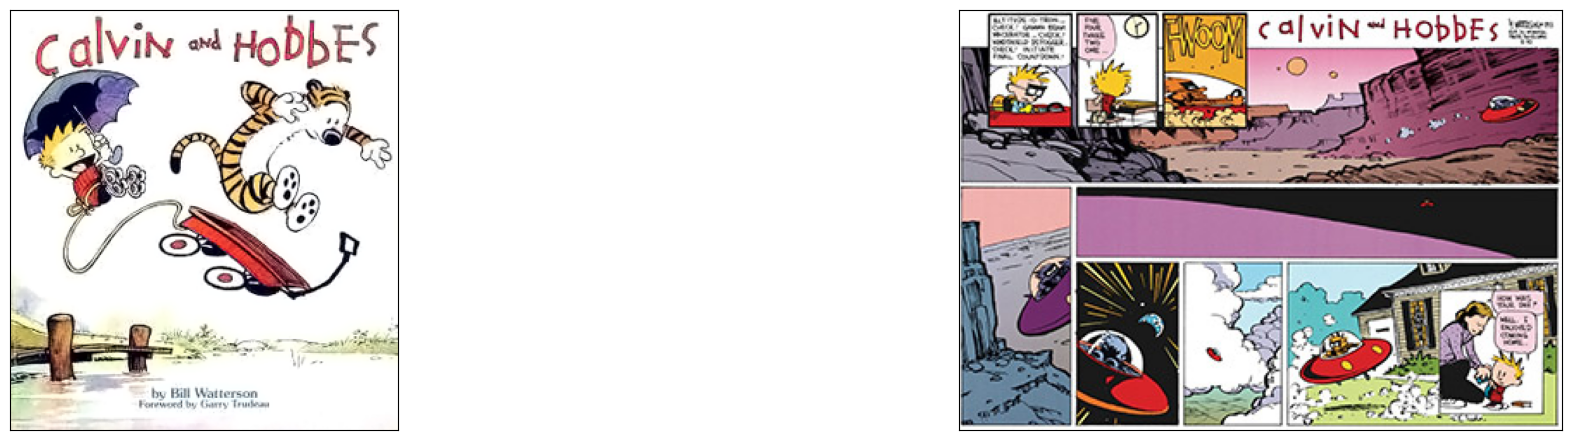

In [22]:
# show sources
from llama_index.response.notebook_utils import display_source_node

for text_node in response.metadata["text_nodes"]:
    display_source_node(text_node, source_length=200)
plot_images(
    [n.metadata["file_path"] for n in response.metadata["image_nodes"]]
)